In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json
import gmaps
import warnings
from scipy import stats
import matplotlib.image as mpimg


In [26]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [70]:
df=pd.read_excel("data.xlsx")

In [50]:
df

,Status,Full Address,Zip,Beds,TotB,EstSF,YrBlt,DOMLS,List Price,Sold Price,Sales to Sold %,Lst Date,Close Date,City,Lot SqFt Approx,LP/SqFt,Price Per SQFT,Sold Price Per SQFT,Off Market Date
0,SOLD,11747 Birch Glen Court,92131,3,3,2034,1985,10,1049000,1160000.0,0.105815,2023-06-27,2023-07-26,San Diego,10428.0,570.30,570.30,570.30,2023-07-06
1,SOLD,15495 Bristol Ridge Ter.,92127,3,3,1930,2007,29,1299900,1255000.0,-0.034541,2023-05-19,2023-07-25,San Diego,NaN,673.52,650.26,650.26,2023-06-23
2,SOLD,4222 Graydon Rd.,92130,4,3,2259,1988,0,1585000,1585000.0,0.000000,2023-07-25,2023-07-25,San Diego,5177.0,701.64,701.64,701.64,2023-07-01
3,SOLD,13590 Freeport Road,92129,5,3,2849,1983,29,1499900,1500000.0,0.000067,2023-06-07,2023-07-24,San Diego,18860.0,526.47,526.50,526.50,2023-07-06
4,SOLD,12780 Maplewood Ct,92064,3,2,2031,1988,7,1275000,1290000.0,0.011765,2023-06-29,2023-07-24,Poway,10108.0,627.77,635.16,635.16,2023-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,ACTIVE,17487 Fairhope Ct,92128,4,3,2352,1980,0,1429000,NaN,-1.000000,2023-07-21,NaT,San Diego,NaN,607.57,607.57,NaN,NaT
342,PENDING,14695 Carmel Ridge Rd,92128,4,3,1843,1988,3,1199000,NaN,-1.000000,2023-07-21,NaT,San Diego,3689.0,650.57,650.57,NaN,2023-07-24
343,ACTIVE,11175 Red Cedar Dr,92131,3,2,1384,1973,4,1120000,NaN,-1.000000,2023-07-22,NaT,San Diego,6300.0,809.25,809.25,NaN,NaT
344,ACTIVE,11695 Corte Guera,92128,4,3,2196,1984,1,1475000,NaN,-1.000000,2023-07-25,NaT,San Diego,6517.0,671.68,671.68,NaN,NaT


In [77]:
df=df[(df['List Price']<1400000)& (df['List Price']>1150000)& (df['Zip']==92129)]

In [78]:
df

,Status,Full Address,Zip,Beds,TotB,EstSF,YrBlt,DOMLS,List Price,Sold Price,Sales to Sold %,Lst Date,Close Date,City,Lot SqFt Approx,LP/SqFt,Price Per SQFT,Sold Price Per SQFT,Off Market Date
32,SOLD,13083 Trail Dust Ave,92129,4,3,1977,1977,5,1200000,1201000.0,8.333333e-04,2023-06-09,2023-07-13,San Diego,7419.0,606.98,607.49,607.49,2023-06-14
45,SOLD,13259 Via San Lorenza,92129,3,3,1707,2003,24,1195000,1185000.0,-8.368201e-03,2023-05-11,2023-07-07,San Diego,3676.0,694.20,694.20,694.20,2023-06-03
67,SOLD,8924 La Cintura Ct,92129,4,2,1578,1983,5,1175000,1225000.0,4.255319e-02,2023-05-18,2023-06-23,San Diego,5848.0,744.61,776.30,776.30,2023-05-23
134,SOLD,9549 Via Pereza,92129,4,3,2164,1980,7,1175000,1220000.0,3.829787e-02,2023-04-11,2023-05-22,Rancho Penasquitos,5800.0,563.77,563.77,563.77,2023-04-20
142,SOLD,10803 Olivia Way,92129,4,3,1935,2020,6,1189900,1300000.0,9.252878e-02,2023-04-19,2023-05-17,San Diego,NaN,614.94,671.83,671.83,2023-04-25
155,SOLD,13825 Via Boltana,92129,4,3,1985,1976,6,1170000,1250000.0,6.837607e-02,2023-04-15,2023-05-10,San Diego,NaN,589.42,629.72,629.72,2023-04-26
169,SOLD,13163 Russet Leaf Ln,92129,3,3,1850,1987,12,1200000,1200000.0,0.000000e+00,2023-03-04,2023-05-01,San Diego,NaN,648.65,648.65,648.65,2023-03-20
179,SOLD,14292 Barrymore St,92129,4,2,1786,1982,5,1195000,1300000.0,8.786611e-02,2023-04-07,2023-04-26,San Diego,5346.0,669.09,727.88,727.88,2023-04-17
188,SOLD,13417 Salmon River Rd,92129,3,3,2516,1980,6,1199000,1500000.0,2.510425e-01,2023-03-17,2023-04-21,San Diego,5300.0,476.55,596.18,596.18,2023-03-29
199,SOLD,8415 Jane St,92129,4,2,2314,1986,0,1199999,1200000.0,8.333340e-07,2023-04-04,2023-04-11,San Diego,NaN,518.58,518.58,518.58,2023-04-04


/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 92129.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 92129.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 92129.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


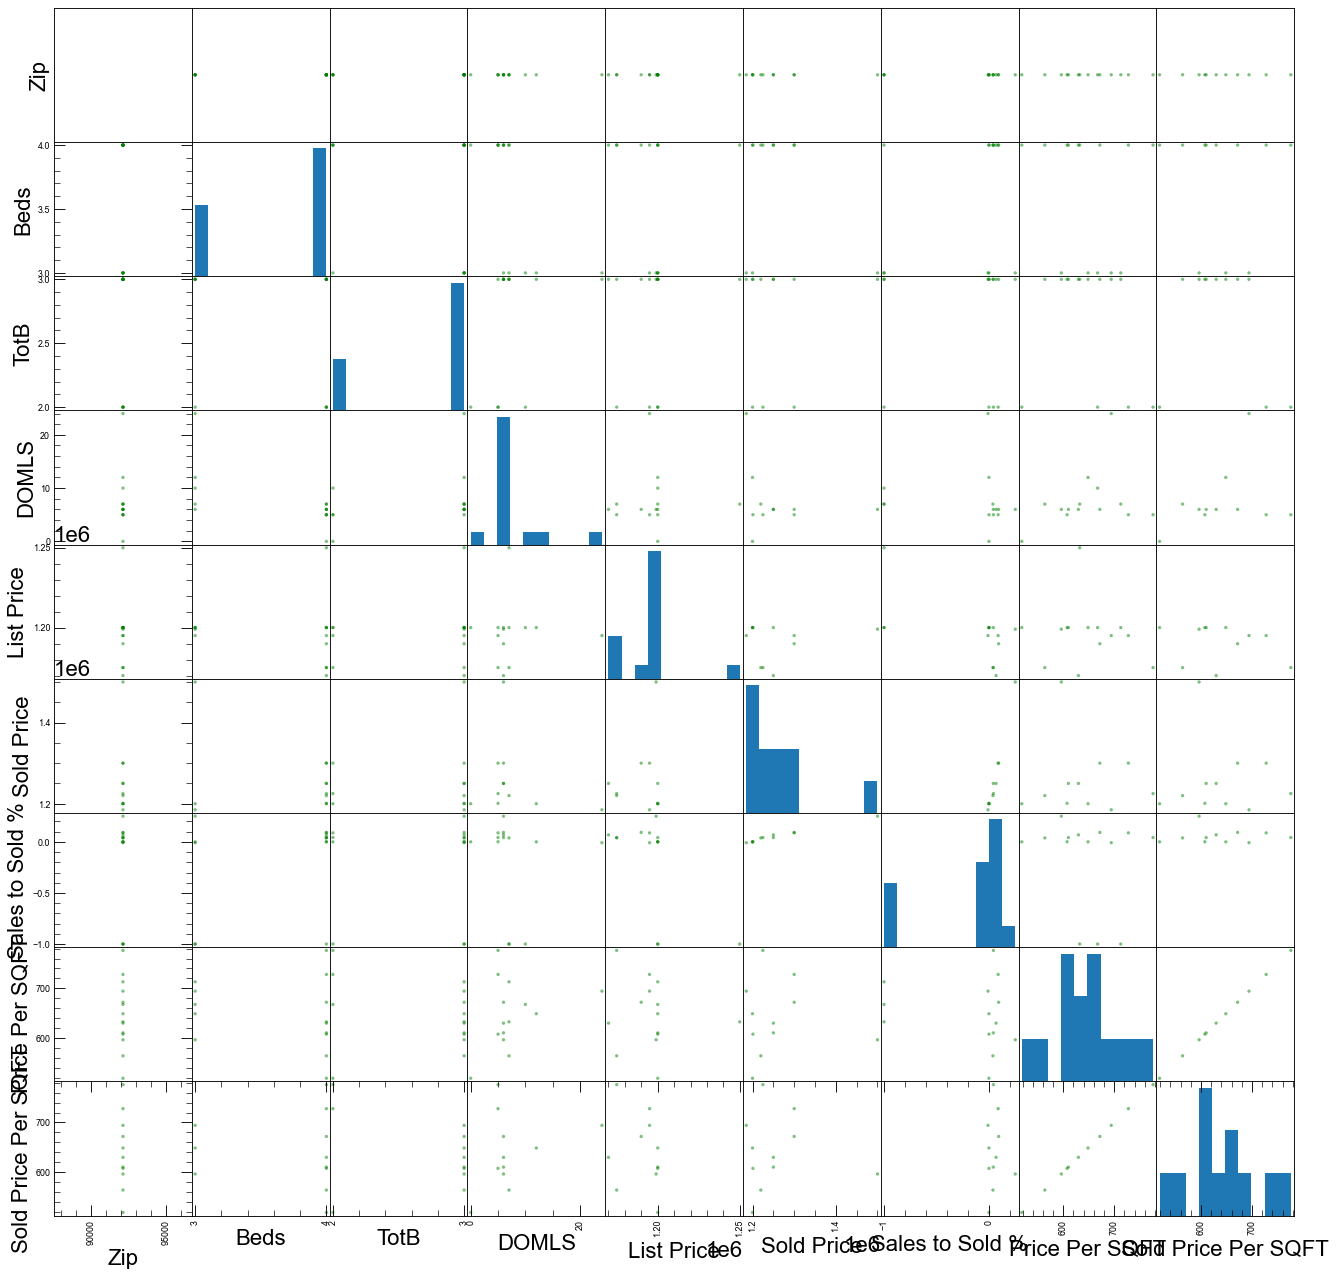

********************************************************************************


In [79]:
col=df[[ 'Zip', 'Beds', 'TotB', 
       'DOMLS', 'List Price', 'Sold Price', 'Sales to Sold %', 'Lst Date',
       'Close Date', 'City', 'Price Per SQFT',
       'Sold Price Per SQFT', 'Off Market Date']]
pd.plotting.scatter_matrix(col,c='g', figsize=(20,20))
plt.show()
print('*'*80)

<AxesSubplot:xlabel='List Price', ylabel='Sold Price'>

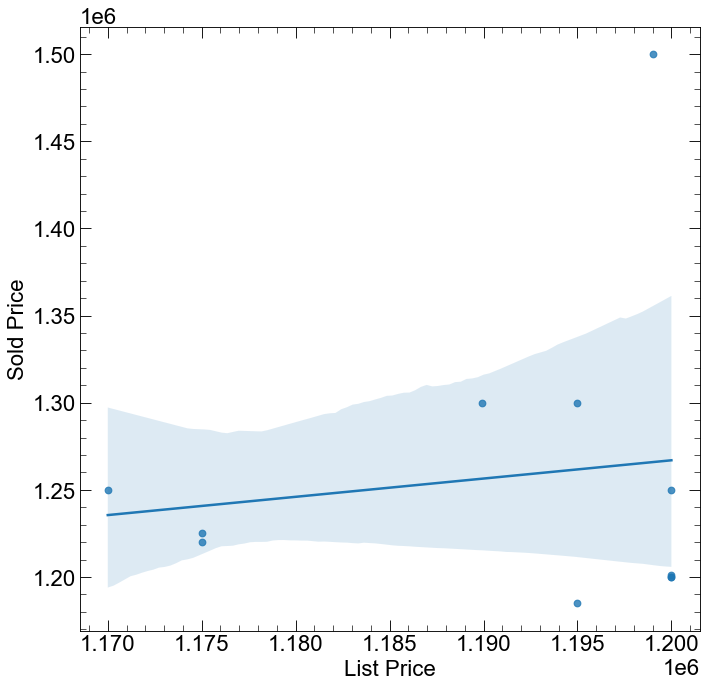

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x='List Price', y='Sold Price', data=df, ax=ax)


In [82]:
df['Sold Price']

32     1201000.0
45     1185000.0
67     1225000.0
134    1220000.0
142    1300000.0
155    1250000.0
169    1200000.0
179    1300000.0
188    1500000.0
199    1200000.0
214    1250000.0
295          NaN
299          NaN
304          NaN
Name: Sold Price, dtype: float64

In [6]:
df.columns

Index(['Status', 'Full Address', 'Zip', 'Beds', 'TotB', 'EstSF', 'YrBlt',
       'DOMLS', 'List Price', 'Sold Price', 'Sales to Sold %', 'Lst Date',
       'Close Date', 'City', 'Lot SqFt Approx', 'LP/SqFt', 'Price Per SQFT',
       'Sold Price Per SQFT', 'Off Market Date'],
      dtype='object')

In [5]:
#shape of the dataframe
df.shape

(346, 19)

In [6]:
#removing the rows with house value less than 1
usa_2012=(usa_2012[(usa_2012['House Value']>0)&
                (usa_2012['Household Income']>0)&
                (usa_2012['Monthly Owner Cost']>0)&
                (usa_2012['Monthly Rent']>0)])

In [7]:
#looking for null value
df.isna().sum()

Status                  0
Full Address            0
Zip                     0
Beds                    0
TotB                    0
EstSF                   0
YrBlt                   0
DOMLS                   0
List Price              0
Sold Price             91
Sales to Sold %         0
Lst Date                0
Close Date             91
City                    0
Lot SqFt Approx        99
LP/SqFt                20
Price Per SQFT          0
Sold Price Per SQFT    91
Off Market Date        39
dtype: int64

In [8]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Status               346 non-null    object        
 1   Full Address         346 non-null    object        
 2   Zip                  346 non-null    int64         
 3   Beds                 346 non-null    int64         
 4   TotB                 346 non-null    int64         
 5   EstSF                346 non-null    int64         
 6   YrBlt                346 non-null    int64         
 7   DOMLS                346 non-null    int64         
 8   List Price           346 non-null    int64         
 9   Sold Price           255 non-null    float64       
 10  Sales to Sold %      346 non-null    float64       
 11  Lst Date             346 non-null    datetime64[ns]
 12  Close Date           255 non-null    datetime64[ns]
 13  City                 346 non-null  

In [9]:
#describing the dataframe
df.describe()

,Zip,Beds,TotB,EstSF,YrBlt,DOMLS,List Price,Sold Price,Sales to Sold %,Lot SqFt Approx,LP/SqFt,Price Per SQFT,Sold Price Per SQFT
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,3.460000e+02,2.550000e+02,346.000000,247.000000,326.000000,346.000000,255.000000
mean,92117.395954,3.771676,2.757225,2092.878613,1985.546243,16.459538,1.713958e+06,1.316231e+06,-0.246023,13101.251012,654.051626,647.774335,641.998392
std,24.279577,0.630073,0.520888,368.293758,12.674951,31.226704,7.592370e+06,1.368568e+05,0.457847,27854.041070,309.289142,102.638990,99.270813
min,92064.000000,3.000000,2.000000,1296.000000,1956.000000,0.000000,9.499000e+05,1.100000e+06,-1.000000,0.000000,410.840000,410.840000,410.840000
25%,92127.000000,3.000000,2.000000,1843.000000,1976.000000,5.000000,1.195000e+06,1.200000e+06,-1.000000,5479.500000,570.480000,576.552500,572.780000
50%,92128.000000,4.000000,3.000000,2068.000000,1986.000000,8.000000,1.297500e+06,1.300000e+06,0.000000,7181.000000,635.280000,642.485000,639.610000
75%,92129.000000,4.000000,3.000000,2318.500000,1991.000000,17.000000,1.404425e+06,1.423394e+06,0.046168,10247.000000,691.662500,700.325000,698.250000
max,92131.000000,5.000000,4.000000,3380.000000,2023.000000,385.000000,1.425000e+08,1.600000e+06,0.261307,317988.000000,5937.350000,1154.410000,1154.410000


In [136]:
#saving csv file for machine learning
ca_2019.to_csv('output_census/ca_2019_ml.csv', index=False)